<a href="https://colab.research.google.com/github/shivanssharma/Deep-Learning-Practise-/blob/main/24040208006_MDSC_302_ASSIGNMENT_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24040208006 MDSC-302 ASSIGNMENT-III

# Exercise
### Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn’t available).
- Load each image, and convert it to a tensor.
- For each image tensor, use the .mean() method to get a sense of how bright
the image is.
- Take the mean of each channel of your images. Can you identify the red,
green, and blue items from only the channel averages?

In [1]:
!pip install torch torchvision torchaudio

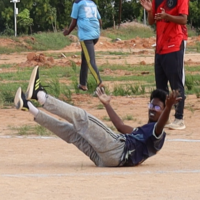

Image 1: /content/Screenshot 2025-04-08 175946.png
  Brightness: 0.6340
  Channel means (R, G, B, [A]): [0.5877431631088257, 0.5110654830932617, 0.43731689453125, 1.0]
  Likely color: RED



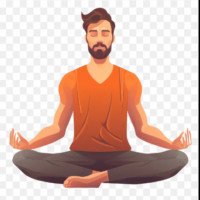

Image 2: /content/Screenshot 2025-04-13 002618.png
  Brightness: 0.8360
  Channel means (R, G, B, [A]): [0.8630895018577576, 0.7590895891189575, 0.7219226360321045, 1.0]
  Likely color: RED



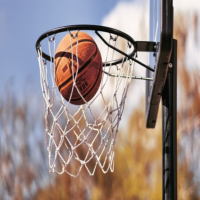

Image 3: /content/basketball image.jpg
  Brightness: 0.5634
  Channel means (R, G, B, [A]): [0.6087040305137634, 0.5473549365997314, 0.5340601801872253]
  Likely color: RED



In [4]:
import torch
import torchvision.io as io
import torchvision.transforms.functional as F
from IPython.display import display

images = [
    "/content/Screenshot 2025-04-08 175946.png",
    "/content/Screenshot 2025-04-13 002618.png",
    "/content/basketball image.jpg"
]


target_size = (200, 200)  # (height, width)

for idx, path in enumerate(images, 1):
    # Load and normalize
    img = io.read_image(path).float() / 255.0

    # Resize
    img_resized = F.resize(img, target_size)

    # Brightness
    brightness = img.mean()

    # Per-channel means
    ch_means = img.mean(dim=(1, 2))

    # Display image
    display(F.to_pil_image(img_resized))

    # Print
    print(f"Image {idx}: {path}")
    print(f"  Brightness: {brightness:.4f}")
    print(f"  Channel means (R, G, B, [A]): {ch_means.tolist()}")

    # Guess color (consider only the first 3 channels for color guess)
    colors = ["RED", "GREEN", "BLUE"]
    # Ensure we only consider the first 3 channels for argmax
    if ch_means.size(0) > 3:
        likely_color = colors[int(torch.argmax(ch_means[:3]))]
    else:
        likely_color = colors[int(torch.argmax(ch_means))]

    print(f"  Likely color: {likely_color}\n")